#### `Necessary Libraries import`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#### `Loading the DataSet`

In [2]:
df_walmart = pd.read_csv("./Walmart.csv")
df_walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


#### `Perform Exploratory Data Analysis (EDA)`

- `Null value Check`

In [3]:
df_walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

- `Duplicate Data Check`

In [4]:
# Check for duplicated rows in x_train and x_test
print("Duplicated rows in x_train:", df_walmart.duplicated().sum())
print("Duplicated rows in x_test:", df_walmart.duplicated().sum())

# Remove duplicated rows
# Example: x_train = x_train.drop_duplicates()

Duplicated rows in x_train: 0
Duplicated rows in x_test: 0


- `Unique Data Check`

In [5]:
df_walmart['CPI'].unique()

array([211.0963582, 211.2421698, 211.2891429, ..., 214.6772833,
       214.7212488, 214.7415392])

- `DataSet Description`

In [6]:
df_walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
# Display summary statistics for each column.
df_walmart.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


- `DataSet Information`

In [8]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


#### `Feature Engineering`

In [9]:
# To encode the 'Date' column in your DataFrame 'df_walmart'
label_encoder = LabelEncoder()
df_walmart['Date'] = label_encoder.fit_transform(df_walmart['Date'])
df_walmart['Date'].unique()

array([ 19,  52,  85, 118,  20,  53,  86, 119,   5,  38,  71, 104, 137,
        30,  63,  96, 129,  17,  50,  83, 116,   6,  39,  72, 105, 138,
        28,  61,  94, 127,  12,  45,  78, 111,   3,  36,  69, 102, 135,
        23,  56,  89, 122,  13,  46,  79, 112, 142,  29,  62,  95, 128,
        14,  47,  80, 113,  15,  48,  81, 114,   0,  33,  66,  99, 132,
        26,  59,  92, 125,  10,  43,  76, 109,   2,  35,  68, 101, 134,
        21,  54,  87, 120,   7,  40,  73, 106, 139,  32,  65,  98, 131,
        18,  51,  84, 117,   8,  41,  74, 107, 140,  24,  57,  90, 123,
         9,  42,  75, 108,   4,  37,  70, 103, 136,  25,  58,  91, 124,
        16,  49,  82, 115,   1,  34,  67, 100, 133,  27,  60,  93, 126,
        11,  44,  77, 110, 141,  31,  64,  97, 130,  22,  55,  88, 121])

- `Correlation`

In [10]:
d_corr = df_walmart.corr()
d_corr

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-1.600195e-15,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Date,-1.600195e-15,1.000000e+00,-0.015453,4.516981e-02,0.034668,0.023262,0.002593,-0.004039
Weekly_Sales,-3.353320e-01,-1.545254e-02,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,4.516981e-02,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,3.466788e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,2.326200e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,2.593192e-03,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-4.038805e-03,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


- `Correlation Heatmap`

<Axes: >

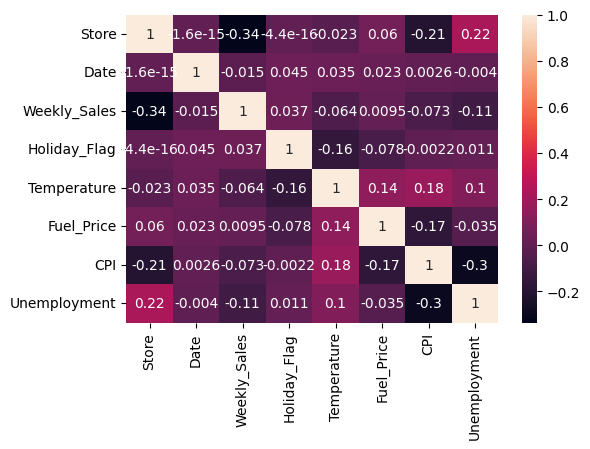

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(d_corr, annot=True)

<Axes: >

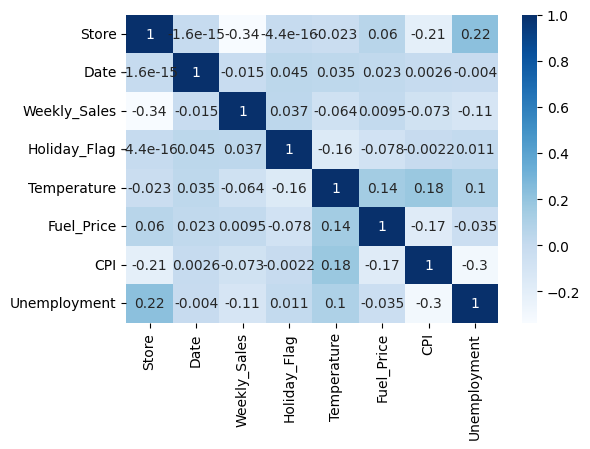

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(d_corr, annot=True, cmap="Blues")

In [13]:
# Convert the 'Date' column in the DataFrame 'df_walmart' to a datetime data type
df_walmart['Date'] = pd.to_datetime(df_walmart['Date'])
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [14]:
# To extract various date-related features from 'Date' column in DataFrame named 'df_walmart'
df_walmart['Year']  = df_walmart['Date'].dt.year
df_walmart['Month'] = df_walmart['Date'].dt.month
df_walmart['Day'] = df_walmart['Date'].dt.weekday
df_walmart['Quarter'] = df_walmart['Date'].dt.quarter
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int32         
 9   Month         6435 non-null   int32         
 10  Day           6435 non-null   int32         
 11  Quarter       6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(4), int64(2)
memory usage: 502.9 KB


In [15]:
# Convert Months and Days from Numerics to Categories
Months_map = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",
              10:"October",11:"November",12:"December"}
df_walmart['Month']= df_walmart['Month'].map(Months_map)

days_map = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df_walmart['Day'] = df_walmart['Day'].map(days_map)

In [16]:
# Classify dates into different seasons based on specific date ranges
def classify_season(date):
    year = str(date.year)
    seasons = {'Spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'Summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'Fall': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['Spring']:
        return 'Spring'
    if date in seasons['Summer']:
        return 'Summer'
    if date in seasons['Fall']:
        return 'Fall'
    else:
        return 'Winter'

df_walmart['Season'] = df_walmart['Date'].map(classify_season)

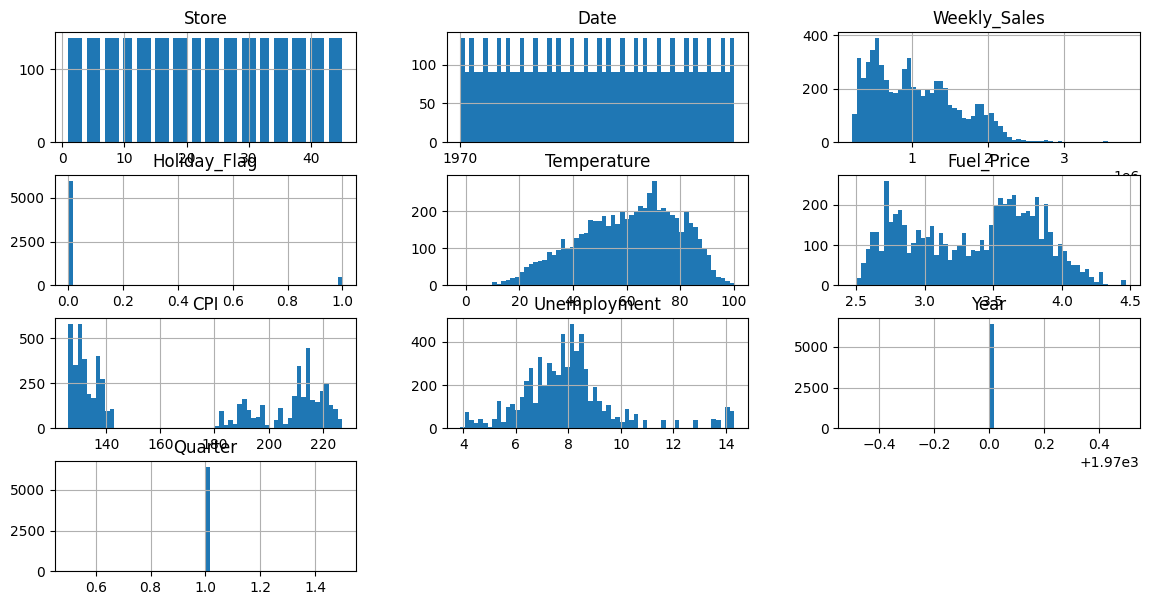

In [17]:
# Lets draw Histogram for all columns
df_walmart.hist(bins=60, figsize=(14,7))
plt.show()

- `Target Guided Encoding of day ,month, year column - 
ranked as per sales as the highest sales is 6.`

In [18]:
T_G_E= {'Sunday':5,'Monday':3, 'Tuesday':0, 'Wednesday':4, 'Thursday':6,  'Friday':1,'Saturday':2}
df_walmart['Day'] = df_walmart['Day'].map(T_G_E)

In [19]:
Back_map = {'January':1,'February':3,'March':4,'April':12,'May':11,'June':6,'July':8,'August':5,'September':7,'October':10,'November':2,'December':9}
df_walmart['Month'] = df_walmart['Month'].map(Back_map)

In [20]:
yr_map = {2010:1, 2011:2, 2012:0}
df_walmart['Year'] = df_walmart['Year'].map(yr_map)

In [21]:
# Categorical to Dummy Variables
df_walmart_p=  pd.get_dummies(df_walmart, columns=[ "Store"],
                         prefix=[ "Store"],
                         drop_first=True)

#### `Model Training and Evaluation`

In [22]:
# Separating target variable and predictors
from sklearn import preprocessing
y_2 = df_walmart_p ['Weekly_Sales']
x_2 = df_walmart_p.drop(['Weekly_Sales',  'Date', 'Season', 'Year', 'Quarter'], axis =1)
X = preprocessing.StandardScaler().fit(x_2).transform(x_2)
# splitting data into training and test data at 70% and 30% respectively
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y_2, train_size = 0.7, random_state = 100)

model = lm.LinearRegression()
model.fit(X_train, Y_train)
y_pred = abs(model.predict(X_test))
print('Y_predicted', y_pred)
print("mean square error: ", mean_squared_error(Y_test, y_pred))

print(f'MSE: {mean_squared_error(Y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(Y_test,y_pred)}')
print(f'R2 Score/Accuracy= : {r2_score(Y_test,y_pred) *100}')


import pickle
pickle.dump(model, open('model.pkl', 'wb'))

Y_predicted [1398613.63193785  885261.3079889   525063.76385204 ...  569841.91035591
 1098633.27690598 1434657.65526189]
mean square error:  25675553339.8895
MSE: 25675553339.8895
MAE: 90787.4056160243
R2 Score/Accuracy= : 91.87207538334931


#### `Regression line plot on training data and Testing data`

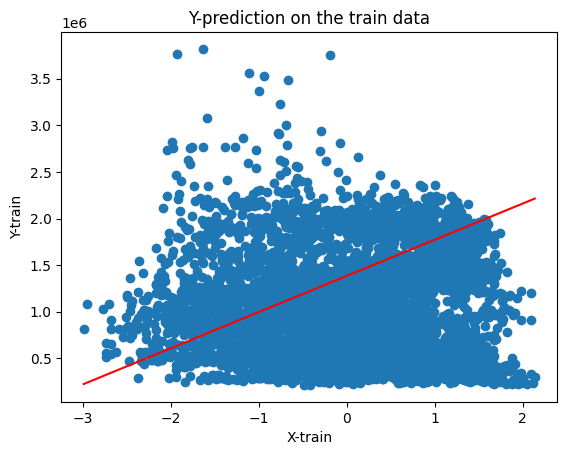

In [23]:
plt.scatter(X_train[:,1], Y_train)
plt.plot([min(X_train[:,1]), max(X_train[:,1])], [min(y_pred), max(y_pred)], color='red')  
plt.xlabel("X-train")
plt.ylabel("Y-train")
plt.title("Y-prediction on the train data")
plt.show()

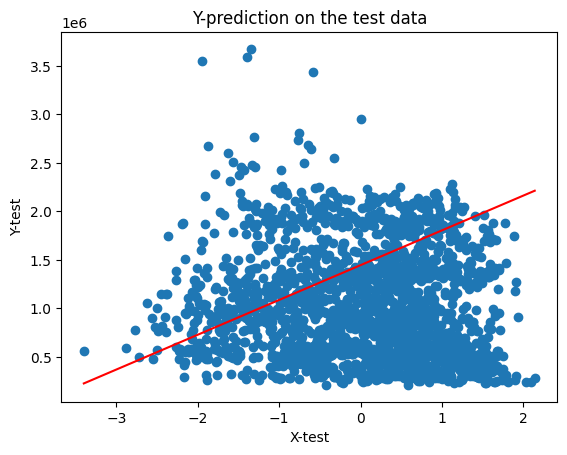

In [24]:
plt.scatter(X_test[:,1], Y_test)
plt.plot([min(X_test[:,1]), max(X_test[:,1])], [min(y_pred), max(y_pred)], color='red')  
plt.xlabel("X-test")
plt.ylabel("Y-test")
plt.title("Y-prediction on the test data")
plt.show()